<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Аналитика</a></span><ul class="toc-item"><li><span><a href="#Количество-рейсов-по-городам" data-toc-modified-id="Количество-рейсов-по-городам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Количество рейсов по городам</a></span></li><li><span><a href="#Рейсы-по-моделям-самолётов" data-toc-modified-id="Рейсы-по-моделям-самолётов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Рейсы по моделям самолётов</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Введение

Загрузим требуемые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В рамках предварительной работы с данными было выполнено несколько запросов, с сохранением выдачи в файлы формата `*.csv`

---
Первый запрос из базы данных с формулировкой "***количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года***", сохранённый в файл `query_1.csv`

``` mysql
SELECT
    aircrafts.model,
    COUNT(flights.flight_id) AS flights_amount
FROM aircrafts
    INNER JOIN flights ON flights.aircraft_code = aircrafts.aircraft_code
WHERE
    flights.departure_time::date >= '2018-09-01'
    AND flights.departure_time::date <= '2018-09-30'
GROUP BY
    aircrafts.model
```
---
Прочитаем данный файл с сохранением его в переменную типа DataFrame

In [2]:
df_model = pd.read_csv('/datasets/query_1.csv')
df_model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185



---
Запрос из базы данных с формулировкой "***среднее количество прибывающих рейсов в день для каждого города за август 2018 года***", сохранённый в файл `query_3.csv`

``` mysql
SELECT
    airports.city,
    COUNT(flights.flight_id)::real/31 AS average_flights
FROM airports
    INNER JOIN flights ON flights.arrival_airport = airports.airport_code 
WHERE
    flights.departure_time::date >= '2018-08-01'
    AND flights.departure_time::date <= '2018-08-31'
GROUP BY
    airports.city
```
---
Аналогично прочитаем данный файл с сохранением его в переменную типа DataFrame

In [3]:
df_city = pd.read_csv('/datasets/query_3.csv')
df_city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


**ВЫВОД**: данные загружены и готовы к анализу.

---

## Аналитика

Первым этапом проверим сведения о типах данных и пропусках:

In [4]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


**Промежуточный вывод**: Пропуски отсутствуют, типы данных соответсвуют.

---

### Количество рейсов по городам

Построим график количества рейсов по городам на основе загруженных данных:

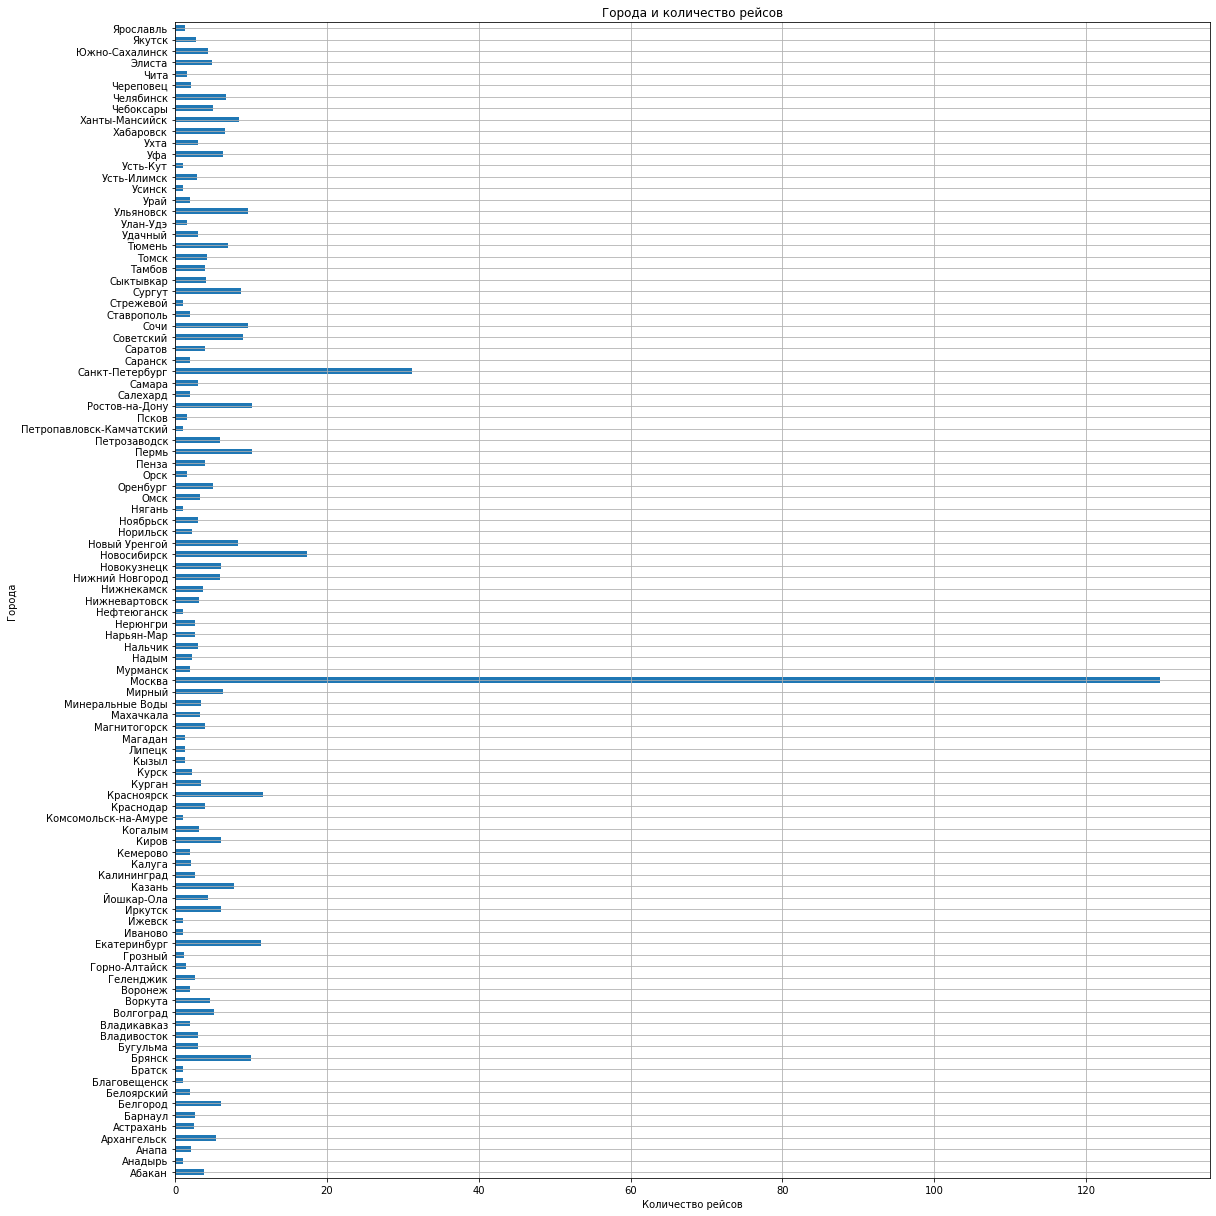

In [6]:
df_city.plot(
    kind='barh',
    x='city',
    figsize=(17,17),
    grid=True,
    title='Города и количество рейсов',
    legend=False)

plt.xlabel('Количество рейсов')
plt.ylabel('Города')
plt.tight_layout()

**Наблюдаются** два основных резких пика, со значениями **>120** рейсов в день (Москва) и **>20** рейсов в день (Санкт-Петербург).

Для уточнения этих показателей выберем "Топ 10" городов с самым большим средним количеством рейсов в день:

In [7]:
df_top10 = df_city.sort_values('average_flights', ascending=False).head(10)
df_top10.style.background_gradient(cmap='GnBu')

,city,average_flights
43,Москва,129.774
70,Санкт-Петербург,31.1613
54,Новосибирск,17.3226
33,Красноярск,11.5806
20,Екатеринбург,11.3226
67,Ростов-на-Дону,10.1935
63,Пермь,10.129
10,Брянск,10
74,Сочи,9.6129
84,Ульяновск,9.58065


Результат подтверждает предыдущий график. Присутствуют два города с сильно отличающимися от остальных показателями, а именно **Москва** со значением **~130** рейсов в день и **Санкт-Петербург** со значениемм в **31** рейс в день, что соответствует "пикам" с прошлого графика.

Нижняя граница топа находится на значении в районе **10 рейсов в день**, что тем не менее - больше среднего значения почти в 2 раза:

In [8]:
df_top10.iloc[-1]['average_flights'] / df_city['average_flights'].mean()

1.743777828299752

Также получим и остальные значения в результате вывода метода `describe()`

In [9]:
df_city['average_flights'].describe()

count    101.000000
mean       5.494189
std       13.119790
min        1.000000
25%        2.000000
50%        3.000000
75%        5.870968
max      129.774194
Name: average_flights, dtype: float64

Минмальное количество рейсов в день составляет **1**, для следующих городов:

In [10]:
df_city[df_city['average_flights'] == 1]

,city,average_flights
1,Анадырь,1.0
8,Благовещенск,1.0
9,Братск,1.0
21,Иваново,1.0
22,Ижевск,1.0
31,Комсомольск-на-Амуре,1.0
49,Нефтеюганск,1.0
58,Нягань,1.0
65,Петропавловск-Камчатский,1.0
76,Стрежевой,1.0


Построим также график "топ-10"

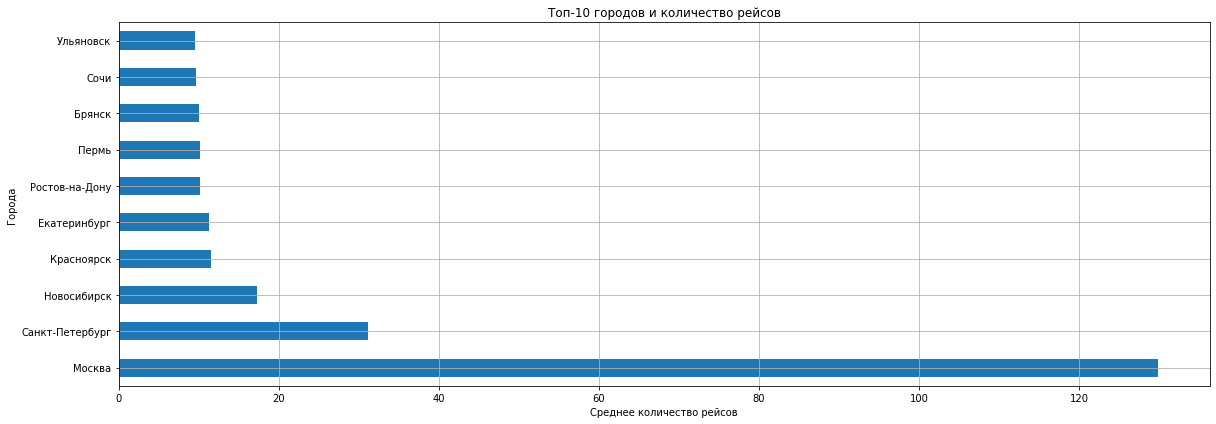

In [11]:
df_top10.plot(
    kind='barh',
    x='city',
    figsize=(17,6),
    grid=True,
    title='Топ-10 городов и количество рейсов',
    legend=False)

plt.xlabel('Среднее количество рейсов')
plt.ylabel('Города')
plt.tight_layout()

**ВЫВОД**:

- Присутствуют два города с сильно отличающимися от остальных показателями, а именно **Москва** со значением **~130 рейсов в день** и **Санкт-Петербург** со значениемм в **31 рейс в день**;
- Нижняя граница "топ-10" находится на отметке **~10 рейсов в день**, что больше среднего значения почти в 2 раза;
- Минимальное количество рейсов составялет - **1 рейс в день**.

---

### Рейсы по моделям самолётов

Построим график типа barplot, показывающий количество рейсов, приходящиеся на каждую модель самолёта.

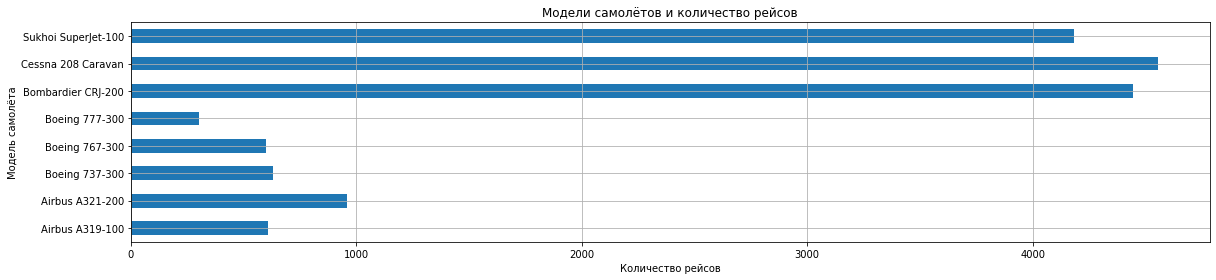

In [12]:
df_model.plot(
    kind='barh',
    figsize=(17,4),
    grid=True,
    x='model',
    legend=False,
    title='Модели самолётов и количество рейсов')

plt.xlabel('Количество рейсов')
plt.ylabel('Модель самолёта')
plt.tight_layout()

Наблюдается значительный отрыв в количестве перевозок у трёх моделей самолётов ***Bombardier CRJ-200***, ***Cessna 208 Caravan*** и ***Sukhoi SuperJet-100***, отличающихся малой пассажировместимостью, от 13 у Cessna, до 98 у СуперДжета, что предполагает их использование для региональных перелётов (на меньшие расстояния).

Оценим количество людей, которые могли быть перевезены при максимальной загрузке, для этого добавим справочное значение количества посадочных мест по моделям, и максимальное теоретическое количество пассажиров.

In [13]:
df_model['seats'] = pd.Series([134,185,147,261,451,50,13,98])
df_model['passengers'] = df_model['seats'] * df_model['flights_amount']
df_model

,model,flights_amount,seats,passengers
0,Airbus A319-100,607,134,81338
1,Airbus A321-200,960,185,177600
2,Boeing 737-300,630,147,92610
3,Boeing 767-300,600,261,156600
4,Boeing 777-300,300,451,135300
5,Bombardier CRJ-200,4446,50,222300
6,Cessna 208 Caravan,4557,13,59241
7,Sukhoi SuperJet-100,4185,98,410130


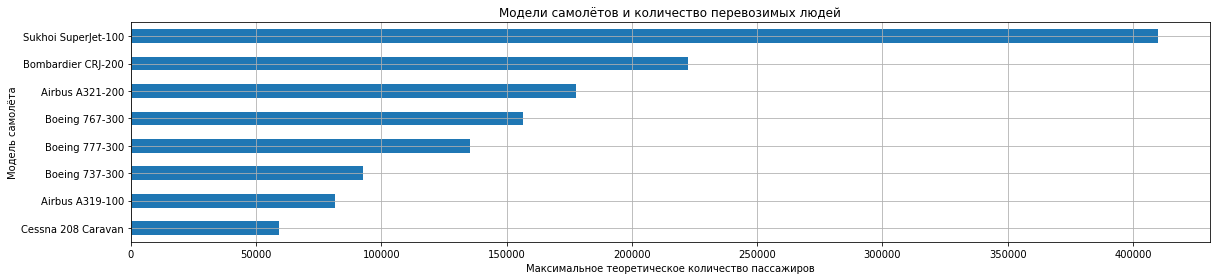

In [14]:
df_model.sort_values('passengers').plot(
    kind='barh',
    figsize=(17,4),
    grid=True,
    x='model',
    y='passengers',
    legend=False,
    title='Модели самолётов и количество перевозимых людей')

plt.xlabel('Максимальное теоретическое количество пассажиров')
plt.ylabel('Модель самолёта')
plt.tight_layout()

В этом случае ***Cessna 208 Caravan*** из-за своей малой вместимости отходит на последнее место, но лидерство региональных перевозок на ***Bombardier CRJ-200*** и ***Sukhoi SuperJet-100*** остаётся несомненным.

**ВЫВОД**:
- основные совершаемые перевозки - региональные, т.е. внутри страны на небольшие расстояния;
- при намного меньшем количестве дальних рейсов ("больших" самолётов), теоретическое количество перевозимых таких образом пассажиров сопоставимо с региональными перевозками. 

## Вывод

Данные проанализированы, со следующими результатам:

- Рейсы по **городам**:
  - Присутствуют два города с сильно отличающимися от остальных показателями, а именно **Москва** со значением **~130 рейсов в день** и **Санкт-Петербург** со значением в **~30 рейс в день**;
  - Нижняя граница "топ-10" городов по рейсам находится на отметке **~10 рейсов в день**, что больше среднего значения в 1.7 раза;
  - Минимальное количество рейсов составялет - **1 рейс в день**;
  
  
- Перевозки по **моделям самолётов**:
  - Наблюдается значительный отрыв в количестве перевозок у моделей самолётов, расчитанные на региональные перелёты (*Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100*), отличающихся малой пассажировместимостью;
  - При намного меньшем количестве дальних рейсов ("больших" самолётов), общее теоретическое количество перевозимых таких образом пассажиров сопоставимо с региональными перевозками;
  
  
- С точки зрения поставленной задачи (анализ спрос пассажиров в города с фестивалями):
  - Точную взаимосвязь трафика с фестивалями установить невозможно, в связи с отсутсвием доступа ко всем данным;
  - Основываясь на существующих сведениях можно установить:
    - что большая часть всех перемещений связано традиционно со столицами (Москва и СПб);
    - большое количество региональных перелётов показывает, что возможные посетители фестивалей с большей вероятностью полетят в соседий город, а не на другой конец страны;
  - При сопоставлении двух вышеуказанных фактов - наиболее выгодный с точки зрения авиаперевозчика (условной авиакомпании ***F9***) сценарий развития событий - фестивали в городах из "топ 10".